### 시각화
#### domain knowledge: 해당 분야 전문가의 노하우
#### datetime 넣는게 왜 어려웠는지
#### 상위5% 드는 노하우
171203

#### 시각화 뽑기전에 어떤 그림 나올지 미리 예상을 해보자
day 고루, month 고루, datetime-hour ?
> year 붙인month hour (month를 그냥 넣으면 0.44 줄어듦)

직관적인 게 중요

##### 살았냐 죽었냐- countplot
##### 숫자를 봐야 할때- barplot + y축에 label
##### x축간의 연관성이 있을 때 - pointplot

엑셀은 100MB넘어가면 느려짐. 시각화 기능이 그리 많지 않음

In [6]:
import pandas as pd

In [7]:
train= pd.read_csv("data/train.csv", index_col="PassengerId")

In [8]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
%matplotlib inline
import seaborn as sns
#matplot lib 를 쓰기 쉽게 랩핑. 부족한건 나중에 맽플롯걸로 써서 덧붙이면됨

[seaborn](http://seaborn.pydata.org/)
주로 5개 정도가 메인
그 위주로 하다가 결과가 안 나올때만 다른거. 링크에서 코드그대로 갖다쓰면 됨

### countplot

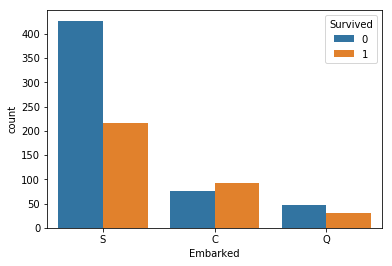

In [10]:
#sns.countplot(data=train, x="Embarked") #단지 low 개수
#생존자 사망자차이
#hue: 해당 컬럼, 값별로 쪼개서 시각화
sns.countplot(data=train, x="Embarked", hue="Survived") 

In [11]:
%save tempView.py 6-10

File `tempView.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `tempView.py`:
import pandas as pd
train= pd.read_csv("data/train.csv", index_col="PassengerId")
print(train.shape)
train.head()
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#matplot lib 를 쓰기 쉽게 랩핑. 부족한건 나중에 맽플롯걸로 써서 덧붙이면됨
#sns.countplot(data=train, x="Embarked") #단지 low 개수
#생존자 사망자차이
#hue: 해당 컬럼, 값별로 쪼개서 시각화
sns.countplot(data=train, x="Embarked", hue="Survived") 


##### 시각화 단점: 구체적 숫자를 모름
엑셀: 세세한 값은 알지만, 큰 그림을 보긴 어려움
#### 숫자가 들어가면 너무 잘게 쪼개짐

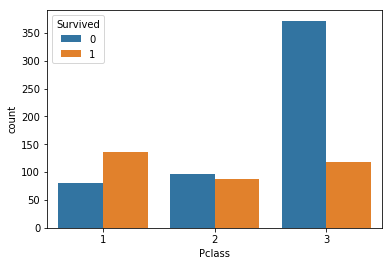

In [16]:
# sns.countplot(data=train, x="Pclass")
sns.countplot(data=train, x="Pclass", hue="Survived")

### barplot
countplot 과 달리 y가 있음
숫자가 있음- 숫자나 정수 차이를 보여줌

까만선: 표준편차. 작으면 평균에서 크게 벗어나지 않는다

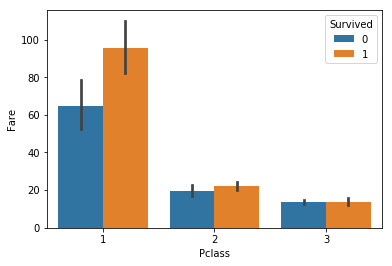

In [21]:
# 2개 띄우면 겹쳐서 그려짐
# sns.barplot(data=train, x="Pclass")
# sns.barplot(data=train, x="Pclass", y="Fare")
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### pointplot
barplot과 거의 완벽하게 똑같음(쓰는 게)
##### x축이 서로간에 연관성(continuous)이 있을땐 pointplot

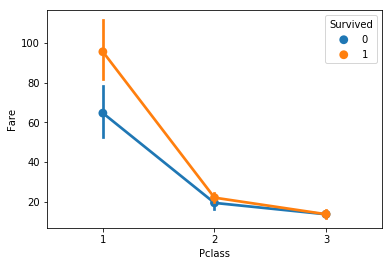

In [22]:
sns.pointplot(data=train, x="Pclass", y="Fare", hue="Survived")

### distplot
##### data전체가 아니라 칼럼만 넣음
ex. 운임요금의 전반적인 분포를 알 수 있음

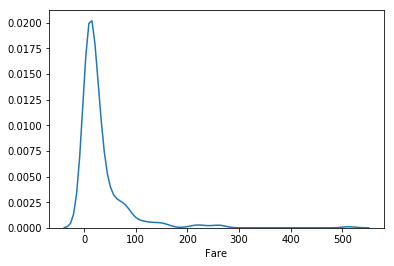

In [24]:
sns.distplot(train["Fare"], hist=False)
# hist. 히스토그램. 막대 나누는 분기점에 따라 모양새가 전혀달라져서 초보자에겐 비추. 천장 가로길이: '빈'

확 쏠린 이유- 평균 32인데, 500낸 사람이 2명. outline > 두분 뺍시다

In [28]:
low_fare= train[train["Fare"]< 100]
# low_fare.shape

(838, 11)

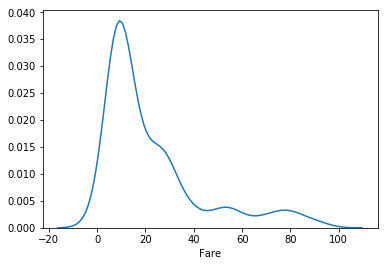

In [32]:
sns.distplot(low_fare["Fare"], hist=False)

다른 컬럼이랑 같이 보고 싶다면?

In [47]:
low_fare= train[train["Fare"]< 500]
# low_fare는 값이고, perish, perish/ survived는 생존여부를 알고 싶은 것이므로. "Survived"를 넣어야
# low_fare["Fare"] 넣으면 singular matrix 에러남
perish= low_fare[low_fare["Survived"]== 0]
survived= low_fare[low_fare["Survived"]== 1]
perish

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


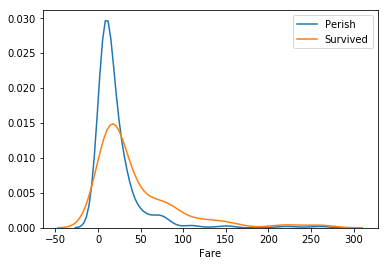

In [48]:
#hist만 보고 싶으면 kde=False
sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

### lmplot (scatter plot)
점을 찍어 나타냄. 선_fit regression: 회귀선

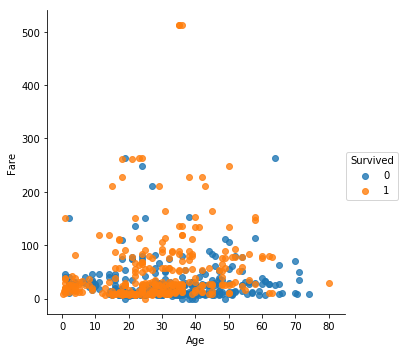

In [49]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)
#겹쳐서 안보이는 거? seaborn 갤러리에 depth를 주는거- ex. heat map
# density- http://seaborn.pydata.org/examples/joint_kde.html

### subplot @matplot
여러개의 시각화를 한 번에

In [50]:
import matplotlib.pyplot as plt

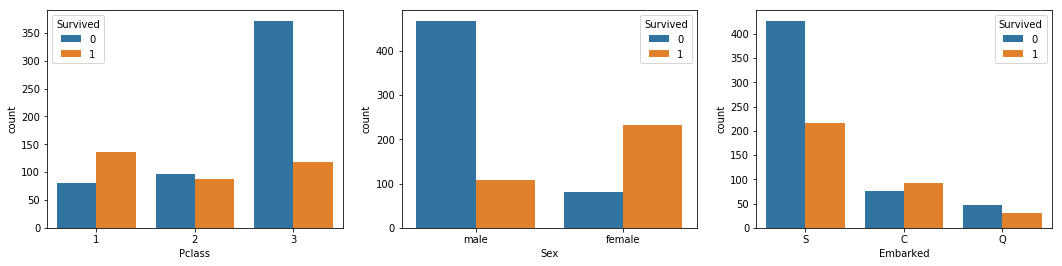

In [54]:
#ax: 넣는 위치
figure, (ax1, ax2, ax3)= plt.subplots(nrows=1, ncols=3)
#예쁘게
figure.set_size_inches(18,4)

#마지막에만 들어감
# sns.countplot(data=train, x="Pclass", hue="Survived")
# sns.countplot(data=train, x="Sex", hue="Survived")
# sns.countplot(data=train, x="Embarked", hue="Survived")

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)

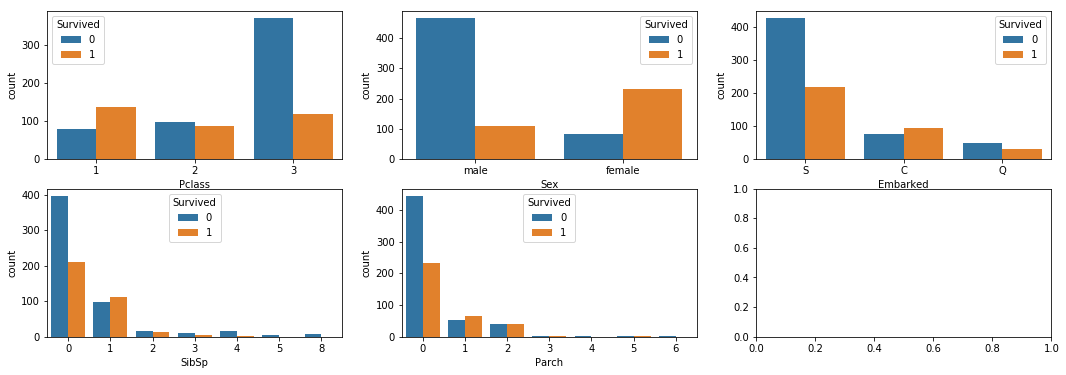

In [60]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,6)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)

sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)

subplot에 하나만 넣기- 하나보더라도 더 예쁘게

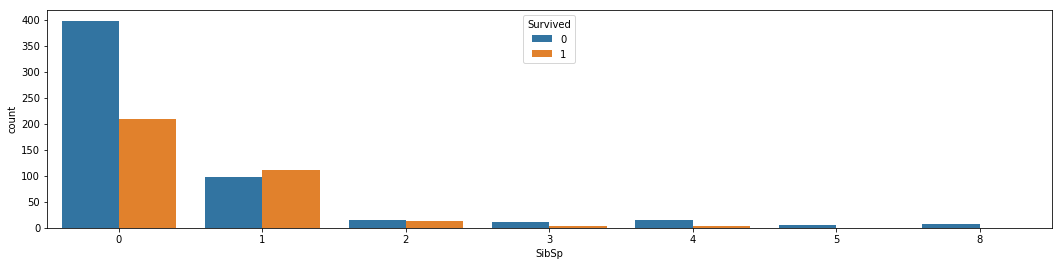

In [66]:
figure, ax1= plt.subplots(nrows=1, ncols=1)
# 이거 차이
figure.set_size_inches(18,4)

sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax1)
# figure, ax2= plt.subplots(nrows=1, ncols=1)

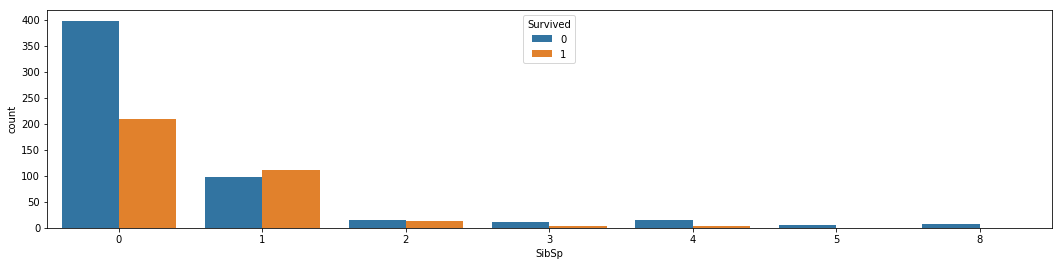

In [66]:
figure, ax1= plt.subplots(nrows=1, ncols=1)
# 이거 차이
figure.set_size_inches(18,4)

sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax1)
# figure, ax2= plt.subplots(nrows=1, ncols=1)

label을 예쁘게 보고 싶다면? matplot. 아니면 포토샵 ㄱㄱ